In [1]:
import numpy as np
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

from tqdm import tqdm
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
# Define the paths
train_dir = 'dataset_raw/train'
val_dir = 'dataset_raw/val'
test_dir = 'dataset_raw/test'

# Image data generator for training
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

Found 6253 images belonging to 2 classes.
Found 6221 images belonging to 2 classes.
Found 6216 images belonging to 2 classes.


In [3]:
# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,729 (12.63 MB)

 Trainable params: 3,309,729 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.6641 - loss: 0.6045 - val_accuracy: 0.7663 - val_loss: 0.5194
Epoch 2/10
 8/90 ━━━━━━━━━━━━━━━━━━━━ 28s 344ms/step - accuracy: 0.7846 - loss: 0.5045

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.7922 - loss: 0.4906 - val_accuracy: 0.7614 - val_loss: 0.5084
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 73s 799ms/step - accuracy: 0.8035 - loss: 0.4542 - val_accuracy: 0.7988 - val_loss: 0.4857
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8476 - loss: 0.3817 - val_accuracy: 0.7505 - val_loss: 0.5781
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 70s 764ms/step - accuracy: 0.8385 - loss: 0.3850 - val_accuracy: 0.8085 - val_loss: 0.4383
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8377 - loss: 0.3790 - val_accuracy: 0.7787 - val_loss: 0.4065
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 71s 775ms/step - accuracy: 0.8565 - loss: 0.3382 - val_accuracy: 0.8047 - val_loss: 0.4627
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8645 - loss: 0.3385 - val_accuracy: 0.8286 - val_loss: 0.3961
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 69s 751ms/step - accuracy: 0.8690 - loss: 0.3135 - val_accuracy: 0.7708 - val_

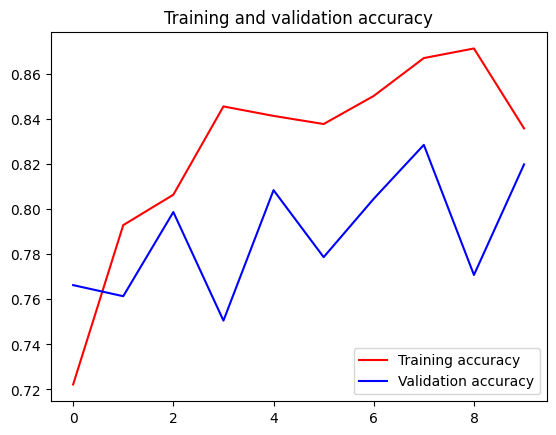

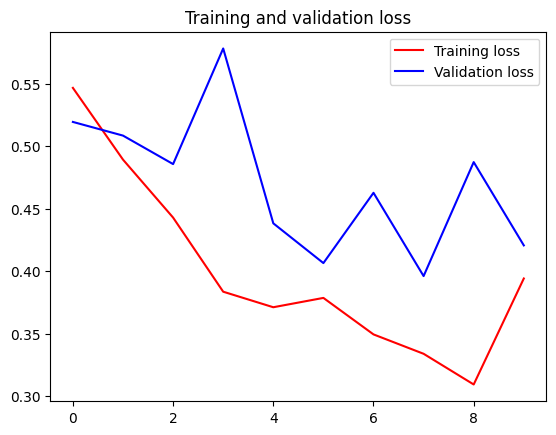

In [4]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=90,  # Number of batches to train on per epoch
    epochs=10,  # Number of epochs to train
    validation_data=val_generator,
    validation_steps=90  # Number of batches to validate on
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=10)
print(f"Test accuracy: {accuracy*100:.2f}%")

# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


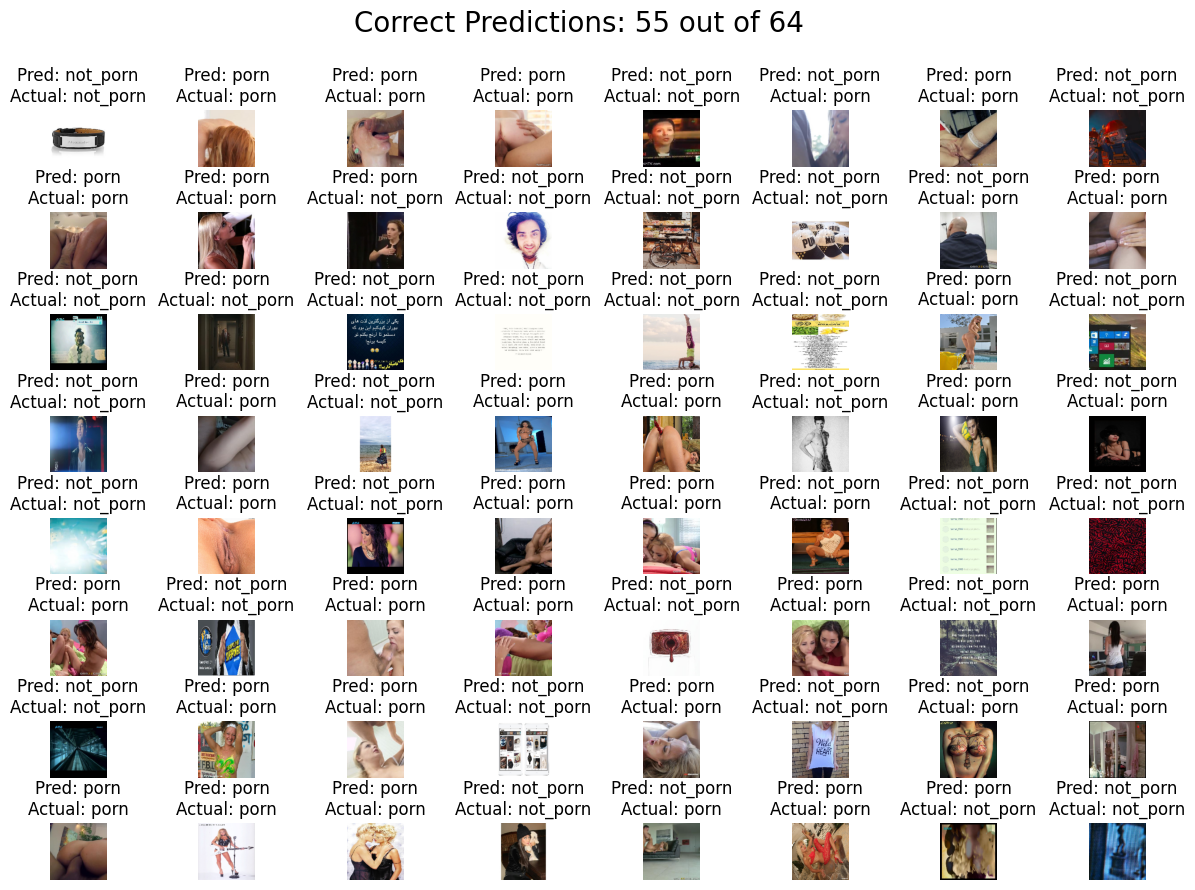

In [10]:
test_images, test_labels = next(test_generator)

predictions = model.predict(test_images)

# Function to decode the predictions
def decode_predictions(preds, threshold=0.5):
    return ['porn' if pred >= threshold else 'not_porn' for pred in preds]
decoded_predictions = decode_predictions(predictions)

correct_predictions = np.sum([(pred == 'porn' and label == 1) or (pred == 'not_porn' and label == 0) for pred, label in zip(decoded_predictions, test_labels)])

# Plot the test images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(len(test_images)):
    plt.subplot(8, 8, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {decoded_predictions[i]}\nActual: {'porn' if test_labels[i] == 1 else 'not_porn'}")
    plt.axis('off')

# Display the count of correct predictions
plt.suptitle(f'Correct Predictions: {correct_predictions} out of {len(test_images)}', fontsize=20)
plt.subplots_adjust(hspace=0.8)
plt.show()

In [ ]:
# model.save('model_v1.h5')